# Chapter 24

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# %load_ext lab_black

## Get and Tweak Data

In [2]:
def tweak_siena_pres(df):
    def int64_to_uint8(df_):
        cols = df_.select_dtypes("int64")
        return df_.astype({col: "uint8" for col in cols})

    return (
        df.rename(columns={"Seq.": "Seq"})
        .rename(
            columns={
                k: v.replace(" ", "_")
                for k, v in {
                    "Bg": "Background",
                    "PL": "Party leadership",
                    "CAb": "Communication ability",
                    "RC": "Relations with Congress",
                    "CAp": "Court appointments",
                    "HE": "Handling of economy",
                    "L": "Luck",
                    "AC": "Ability to compromise",
                    "WR": "Willing to take risks",
                    "EAp": "Executive appointments",
                    "OA": "Overall ability",
                    "Im": "Imagination",
                    "DA": "Domestic accomplishments",
                    "Int": "Integrity",
                    "EAb": "Executive ability",
                    "FPA": "Foreign policy accomplishments",
                    "LA": "Leadership ability",
                    "IQ": "Intelligence",
                    "AM": "Avoid crucial mistakes",
                    "EV": "Experts' view",
                    "O": "Overall",
                }.items()
            }
        )
        .astype({"Party": "category"})
        .pipe(int64_to_uint8)
        .assign(
            Average_rank=lambda df_: (
                df_.select_dtypes("uint8")
                .sum(axis=1)
                .rank(method="dense")
                .astype("uint8")
            ),
            Quartile=lambda df_: pd.qcut(
                df_.Average_rank, 4, labels="1st 2nd 3rd 4th".split()
            ),
        )
    )

In [3]:
url = "https://github.com/mattharrison/datasets/raw/master/data/siena2018-pres.csv"

df = pd.read_csv(url, index_col=1).drop(["Unnamed: 0"], axis=1)
df.head()

President                  Party  Bg  Im  Int  IQ   L  WR  AC  \
Seq.                                                                          
1     George Washington            Independent   7   7    1  10   1   6   2   
2            John Adams             Federalist   3  13    4   4  24  14  31   
3      Thomas Jefferson  Democratic-Republican   2   2   14   1   8   5  14   
4         James Madison  Democratic-Republican   4   6    7   3  16  15   6   
5          James Monroe  Democratic-Republican   9  14   11  18   6  16   7   

      EAb  ...  PL  RC  CAp  HE  EAp  DA  FPA  AM  EV   O  
Seq.       ...                                             
1       2  ...  18   1    1   1    1   2    2   1   2   1  
2      21  ...  28  17    4  13   15  19   13  16  10  14  
3       6  ...   5   5    7  20    4   6    9   7   5   5  
4      13  ...   9  10    6  14    7  11   19  11   8   7  
5      10  ...  12   8   11   9    9  10    5   6   9   8  

[5 rows x 23 columns]

In [4]:
pres = tweak_siena_pres(df)
pres.head()

President                  Party  Background  Imagination  \
Seq.                                                                      
1     George Washington            Independent           7            7   
2            John Adams             Federalist           3           13   
3      Thomas Jefferson  Democratic-Republican           2            2   
4         James Madison  Democratic-Republican           4            6   
5          James Monroe  Democratic-Republican           9           14   

      Integrity  Intelligence  Luck  Willing_to_take_risks  \
Seq.                                                         
1             1            10     1                      6   
2             4             4    24                     14   
3            14             1     8                      5   
4             7             3    16                     15   
5            11            18     6                     16   

      Ability_to_compromise  Executive_ability  ...  Court_appointments  \
Seq.                                            ...                       
1                         2                  2  ...                   1   
2                        31                 21  ...                   4   
3                        14                  6  ...                   7   
4                         6                 13  ...                   6   
5                         7                 10  ...                  11   

      Handling_of_economy  Executive_appointments  Domestic_accomplishments  \
Seq.                                                                          
1                       1                       1                         2   
2                      13                      15                        19   
3                      20                       4                         6   
4                      14                       7                        11   
5                       9                       9                        10   

      Foreign_policy_accomplishments  Avoid_crucial_mistakes  Experts'_view  \
Seq.                                                                          
1                                  2                       1              2   
2                                 13                      16             10   
3                                  9                       7              5   
4                                 19                      11              8   
5                                  5                       6              9   

      Overall  Average_rank  Quartile  
Seq.                                   
1           1             1       1st  
2          14            13       2nd  
3           5             5       1st  
4           7             7       1st  
5           8             8       1st  

[5 rows x 25 columns]

## 24.1

In [5]:
def name_to_initial(val):
    names = val.split()
    return " ".join([f"{names[0][0]}.", *names[1:]])

In [6]:
(pres.set_index("President").rename(name_to_initial))

Party  Background  Imagination  Integrity  \
President                                                                      
G. Washington                Independent           7            7          1   
J. Adams                      Federalist           3           13          4   
T. Jefferson       Democratic-Republican           2            2         14   
J. Madison         Democratic-Republican           4            6          7   
J. Monroe          Democratic-Republican           9           14         11   
J. Quincy Adams    Democratic-Republican           1            9          6   
A. Jackson                    Democratic          37           15         29   
M. Van Buren                  Democratic          23           22         27   
W. Henry Harrison                   Whig          22           38         28   
J. Tyler                     Independent          34           33         35   
J. K. Polk                    Democratic          19           10         23   
Z. Taylor                           Whig          30           26         22   
M. Fillmore                         Whig          40           37         36   
F. Pierce                     Democratic          38           39         38   
J. Buchanan                   Democratic          36           43         40   
A. Lincoln                    Republican          28            1          2   
A. Johnson                    Democratic          42           42         41   
U. S. Grant                   Republican          20           24         25   
R. B. Hayes                   Republican          35           30         32   
J. A. Garfield                Republican          22           25         21   
C. A. Arthur                  Republican          41           31         37   
G. Cleveland                  Democratic          26           23         26   
B. Harrison                   Republican          33           34         30   
W. McKinley                   Republican          29           20         20   
T. Roosevelt                  Republican           5            4          8   
W. Howard Taft                Republican          12           28         12   
W. Wilson                     Democratic           8            8         19   
W. G. Harding                 Republican          39           41         42   
C. Coolidge                   Republican          32           36         17   
H. Hoover                     Republican          13           35         15   
F. D. Roosevelt               Democratic           6            3         16   
H. S. Truman                  Democratic          31           16          9   
D. D. Eisenhower              Republican          11           18          5   
J. F. Kennedy                 Democratic          14            5         31   
L. B. Johnson                 Democratic          15           11         34   
R. Nixon                      Republican          16           21         43   
G. Ford                       Republican          18           32         10   
J. Carter                     Democratic          25           19          3   
R. Reagan                     Republican          27           17         24   
G. H. W. Bush                 Republican          10           27         18   
B. Clinton                    Democratic          21           12         39   
G. W. Bush                    Republican          17           29         33   
B. Obama                      Democratic          24           11         13   
D. Trump                      Republican          43           40         44   

                   Intelligence  Luck  Willing_to_take_risks  \
President                                                      
G. Washington                10     1                      6   
J. Adams                      4    24                     14   
T. Jefferson                  1     8                      5   
J. Madison                    3   

## 24.2

In [7]:
(pres.set_index("President").reset_index())

President                  Party  Background  Imagination  \
0        George Washington            Independent           7            7   
1               John Adams             Federalist           3           13   
2         Thomas Jefferson  Democratic-Republican           2            2   
3            James Madison  Democratic-Republican           4            6   
4             James Monroe  Democratic-Republican           9           14   
5        John Quincy Adams  Democratic-Republican           1            9   
6           Andrew Jackson             Democratic          37           15   
7         Martin Van Buren             Democratic          23           22   
8   William Henry Harrison                   Whig          22           38   
9               John Tyler            Independent          34           33   
10           James K. Polk             Democratic          19           10   
11          Zachary Taylor                   Whig          30           26   
12        Millard Fillmore                   Whig          40           37   
13         Franklin Pierce             Democratic          38           39   
14          James Buchanan             Democratic          36           43   
15         Abraham Lincoln             Republican          28            1   
16          Andrew Johnson             Democratic          42           42   
17        Ulysses S. Grant             Republican          20           24   
18     Rutherford B. Hayes             Republican          35           30   
19       James A. Garfield             Republican          22           25   
20       Chester A. Arthur             Republican          41           31   
21        Grover Cleveland             Democratic          26           23   
22       Benjamin Harrison             Republican          33           34   
23        William McKinley             Republican          29           20   
24      Theodore Roosevelt             Republican           5            4   
25     William Howard Taft             Republican          12           28   
26          Woodrow Wilson             Democratic           8            8   
27       Warren G. Harding             Republican          39           41   
28         Calvin Coolidge             Republican          32           36   
29          Herbert Hoover             Republican          13           35   
30   Franklin D. Roosevelt             Democratic           6            3   
31         Harry S. Truman             Democratic          31           16   
32    Dwight D. Eisenhower             Republican          11           18   
33         John F. Kennedy             Democratic          14            5   
34       Lyndon B. Johnson             Democratic          15           11   
35           Richard Nixon             Republican          16           21   
36             Gerald Ford             Republican          18           32   
37            Jimmy Carter             Democratic          25           19   
38           Ronald Reagan             Republican          27           17   
39       George H. W. Bush             Republican          10           27   
40            Bill Clinton             Democratic          21           12   
41          George W. Bush             Republican          17           29   
42            Barack Obama             Democratic          24           11   
43            Donald Trump             Republican          43           40   

    Integrity  Intelligence  Luck  Willing_to_take_risks  \
0           1            10     1                      6   
1           4             4    24                     14   
2          14             1     8                      5   
3           7             3    16                     15   
4          11            18     6                     16   
5           6             5    29                     19   
6          29            28     4                      4   
7          27            2

## 24.3

In [8]:
lt10 = pres.Average_rank < 10
pres[lt10]

President                  Party  Background  Imagination  \
Seq.                                                                          
1         George Washington            Independent           7            7   
3          Thomas Jefferson  Democratic-Republican           2            2   
4             James Madison  Democratic-Republican           4            6   
5              James Monroe  Democratic-Republican           9           14   
16          Abraham Lincoln             Republican          28            1   
26       Theodore Roosevelt             Republican           5            4   
32    Franklin D. Roosevelt             Democratic           6            3   
33          Harry S. Truman             Democratic          31           16   
34     Dwight D. Eisenhower             Republican          11           18   

      Integrity  Intelligence  Luck  Willing_to_take_risks  \
Seq.                                                         
1             1            10     1                      6   
3            14             1     8                      5   
4             7             3    16                     15   
5            11            18     6                     16   
16            2             2    18                      1   
26            8             6     2                      2   
32           16            12     5                      3   
33            9            21    12                      8   
34            5            17     7                     21   

      Ability_to_compromise  Executive_ability  ...  Court_appointments  \
Seq.                                            ...                       
1                         2                  2  ...                   1   
3                        14                  6  ...                   7   
4                         6                 13  ...                   6   
5                         7                 10  ...                  11   
16                        1                  1  ...                   3   
26                       15                  4  ...                   9   
32                        4                  3  ...                   2   
33                       12                  8  ...                  17   
34                        5                  5  ...                   5   

      Handling_of_economy  Executive_appointments  Domestic_accomplishments  \
Seq.                                                                          
1                       1                       1                         2   
3                      20                       4                         6   
4                      14                       7                        11   
5                       9                       9                        10   
16                      4                       2                         1   
26                      3                       5                         4   
32                      2                       3                         3   
33                      8                      10                         7   
34                      6                      11                         8   

      Foreign_policy_accomplishments  Avoid_crucial_mistakes  Experts'_view  \
Seq.                                                                          
1                                  2                       1              2   
3                                  9                       7              5   
4                                 19                      11              8   
5                                  5                       6              9   
16                                 6                       2              1   
26                                 3                       5              4   
32                                 1                       4              3   
33                                 4                      

In [9]:
pres[lt10 & (pres.Party == "Republican")]

President       Party  Background  Imagination  Integrity  \
Seq.                                                                         
16         Abraham Lincoln  Republican          28            1          2   
26      Theodore Roosevelt  Republican           5            4          8   
34    Dwight D. Eisenhower  Republican          11           18          5   

      Intelligence  Luck  Willing_to_take_risks  Ability_to_compromise  \
Seq.                                                                     
16               2    18                      1                      1   
26               6     2                      2                     15   
34              17     7                     21                      5   

      Executive_ability  ...  Court_appointments  Handling_of_economy  \
Seq.                     ...                                            
16                    1  ...                   3                    4   
26                    4  ...                   9                    3   
34                    5  ...                   5                    6   

      Executive_appointments  Domestic_accomplishments  \
Seq.                                                     
16                         2                         1   
26                         5                         4   
34                        11                         8   

      Foreign_policy_accomplishments  Avoid_crucial_mistakes  Experts'_view  \
Seq.                                                                          
16                                 6                       2              1   
26                                 3                       5              4   
34                                 7                       3              6   

      Overall  Average_rank  Quartile  
Seq.                                   
16          3             3       1st  
26          4             4       1st  
34          6             6       1st  

[3 rows x 25 columns]

In [10]:
pres.query('Average_rank < 10 and Party == "Republican"')

President       Party  Background  Imagination  Integrity  \
Seq.                                                                         
16         Abraham Lincoln  Republican          28            1          2   
26      Theodore Roosevelt  Republican           5            4          8   
34    Dwight D. Eisenhower  Republican          11           18          5   

      Intelligence  Luck  Willing_to_take_risks  Ability_to_compromise  \
Seq.                                                                     
16               2    18                      1                      1   
26               6     2                      2                     15   
34              17     7                     21                      5   

      Executive_ability  ...  Court_appointments  Handling_of_economy  \
Seq.                     ...                                            
16                    1  ...                   3                    4   
26                    4  ...                   9                    3   
34                    5  ...                   5                    6   

      Executive_appointments  Domestic_accomplishments  \
Seq.                                                     
16                         2                         1   
26                         5                         4   
34                        11                         8   

      Foreign_policy_accomplishments  Avoid_crucial_mistakes  Experts'_view  \
Seq.                                                                          
16                                 6                       2              1   
26                                 3                       5              4   
34                                 7                       3              6   

      Overall  Average_rank  Quartile  
Seq.                                   
16          3             3       1st  
26          4             4       1st  
34          6             6       1st  

[3 rows x 25 columns]

In [11]:
pres.query('@lt10 and Party == "Republican"')

President       Party  Background  Imagination  Integrity  \
Seq.                                                                         
16         Abraham Lincoln  Republican          28            1          2   
26      Theodore Roosevelt  Republican           5            4          8   
34    Dwight D. Eisenhower  Republican          11           18          5   

      Intelligence  Luck  Willing_to_take_risks  Ability_to_compromise  \
Seq.                                                                     
16               2    18                      1                      1   
26               6     2                      2                     15   
34              17     7                     21                      5   

      Executive_ability  ...  Court_appointments  Handling_of_economy  \
Seq.                     ...                                            
16                    1  ...                   3                    4   
26                    4  ...                   9                    3   
34                    5  ...                   5                    6   

      Executive_appointments  Domestic_accomplishments  \
Seq.                                                     
16                         2                         1   
26                         5                         4   
34                        11                         8   

      Foreign_policy_accomplishments  Avoid_crucial_mistakes  Experts'_view  \
Seq.                                                                          
16                                 6                       2              1   
26                                 3                       5              4   
34                                 7                       3              6   

      Overall  Average_rank  Quartile  
Seq.                                   
16          3             3       1st  
26          4             4       1st  
34          6             6       1st  

[3 rows x 25 columns]

In [12]:
partymem = ["Democratic"]

In [13]:
pres.query("Party.isin(@partymem) and Average_rank > 10")

President       Party  Background  Imagination  Integrity  \
Seq.                                                                       
7         Andrew Jackson  Democratic          37           15         29   
8       Martin Van Buren  Democratic          23           22         27   
11         James K. Polk  Democratic          19           10         23   
14       Franklin Pierce  Democratic          38           39         38   
15        James Buchanan  Democratic          36           43         40   
17        Andrew Johnson  Democratic          42           42         41   
22/24   Grover Cleveland  Democratic          26           23         26   
28        Woodrow Wilson  Democratic           8            8         19   
36     Lyndon B. Johnson  Democratic          15           11         34   
39          Jimmy Carter  Democratic          25           19          3   
42          Bill Clinton  Democratic          21           12         39   
44          Barack Obama  Democratic          24           11         13   

       Intelligence  Luck  Willing_to_take_risks  Ability_to_compromise  \
Seq.                                                                      
7                28     4                      4                     38   
8                25    34                     28                     20   
11               23     9                      7                     18   
14               40    39                     38                     39   
15               39    42                     41                     40   
17               42    40                     34                     43   
22/24            27    19                     27                     22   
28                7    14                     11                     35   
36               22    25                     10                      9   
39               15    38                     27                     29   
42                8    11                     17                      3   
44                9    15                     23                     16   

       Executive_ability  ...  Court_appointments  Handling_of_economy  \
Seq.                      ...                                            
7                     11  ...                  30                   25   
8                     28  ...                  25                   31   
11                     7  ...                  22                   15   
14                    39  ...                  41                   40   
15                    42  ...                  43                   42   
17                    43  ...                  44                   43   
22/24                 19  ...                  20                   21   
28                    14  ...                  13                   11   
36                     9  ...                   8                   12   
39                    32  ...                  19                   38   
42                    16  ...                  10                    5   
44                    18  ...                  14                   10   

       Executive_appointments  Domestic_accomplishments  \
Seq.                                                      
7                          25                        17   
8                          26                        29   
11                         16                        12   
14                         39                        41   
15                         43                        44   
17                         42                        43   
22/24                      23                        23   
28                         14                        14   
36                          8                         5   
39                         22                        28   
42                         12                         9   
44                         13                        13   

       Foreign_policy_accomplishmen

## 24.4

In [14]:
pres.iloc[1]

President                         John Adams
Party                             Federalist
Background                                 3
Imagination                               13
Integrity                                  4
Intelligence                               4
Luck                                      24
Willing_to_take_risks                     14
Ability_to_compromise                     31
Executive_ability                         21
Leadership_ability                        21
Communication_ability                     13
Overall_ability                            8
Party_leadership                          28
Relations_with_Congress                   17
Court_appointments                         4
Handling_of_economy                       13
Executive_appointments                    15
Domestic_accomplishments                  19
Foreign_policy_accomplishments            13
Avoid_crucial_mistakes                    16
Experts'_view                             10
Overall   

In [15]:
pres.iloc[[1]]

President       Party  Background  Imagination  Integrity  \
Seq.                                                               
2     John Adams  Federalist           3           13          4   

      Intelligence  Luck  Willing_to_take_risks  Ability_to_compromise  \
Seq.                                                                     
2                4    24                     14                     31   

      Executive_ability  ...  Court_appointments  Handling_of_economy  \
Seq.                     ...                                            
2                    21  ...                   4                   13   

      Executive_appointments  Domestic_accomplishments  \
Seq.                                                     
2                         15                        19   

      Foreign_policy_accomplishments  Avoid_crucial_mistakes  Experts'_view  \
Seq.                                                                          
2                                 13                      16             10   

      Overall  Average_rank  Quartile  
Seq.                                   
2          14            13       2nd  

[1 rows x 25 columns]

In [16]:
pres.iloc[[0, 5, 10]]

President                  Party  Background  Imagination  \
Seq.                                                                      
1     George Washington            Independent           7            7   
6     John Quincy Adams  Democratic-Republican           1            9   
11        James K. Polk             Democratic          19           10   

      Integrity  Intelligence  Luck  Willing_to_take_risks  \
Seq.                                                         
1             1            10     1                      6   
6             6             5    29                     19   
11           23            23     9                      7   

      Ability_to_compromise  Executive_ability  ...  Court_appointments  \
Seq.                                            ...                       
1                         2                  2  ...                   1   
6                        24                 22  ...                  15   
11                       18                  7  ...                  22   

      Handling_of_economy  Executive_appointments  Domestic_accomplishments  \
Seq.                                                                          
1                       1                       1                         2   
6                      17                      18                        21   
11                     15                      16                        12   

      Foreign_policy_accomplishments  Avoid_crucial_mistakes  Experts'_view  \
Seq.                                                                          
1                                  2                       1              2   
6                                 15                      14             18   
11                                 8                       8             13   

      Overall  Average_rank  Quartile  
Seq.                                   
1           1             1       1st  
6          18            18       2nd  
11         12            11       1st  

[3 rows x 25 columns]

In [17]:
pres.iloc[lambda df: [0, 5, 10]]

President                  Party  Background  Imagination  \
Seq.                                                                      
1     George Washington            Independent           7            7   
6     John Quincy Adams  Democratic-Republican           1            9   
11        James K. Polk             Democratic          19           10   

      Integrity  Intelligence  Luck  Willing_to_take_risks  \
Seq.                                                         
1             1            10     1                      6   
6             6             5    29                     19   
11           23            23     9                      7   

      Ability_to_compromise  Executive_ability  ...  Court_appointments  \
Seq.                                            ...                       
1                         2                  2  ...                   1   
6                        24                 22  ...                  15   
11                       18                  7  ...                  22   

      Handling_of_economy  Executive_appointments  Domestic_accomplishments  \
Seq.                                                                          
1                       1                       1                         2   
6                      17                      18                        21   
11                     15                      16                        12   

      Foreign_policy_accomplishments  Avoid_crucial_mistakes  Experts'_view  \
Seq.                                                                          
1                                  2                       1              2   
6                                 15                      14             18   
11                                 8                       8             13   

      Overall  Average_rank  Quartile  
Seq.                                   
1           1             1       1st  
6          18            18       2nd  
11         12            11       1st  

[3 rows x 25 columns]

In [18]:
pres.iloc[[0, 5, 10], 1]

Seq.
1               Independent
6     Democratic-Republican
11               Democratic
Name: Party, dtype: category
Categories (6, object): ['Democratic', 'Democratic-Republican', 'Federalist', 'Independent', 'Republican', 'Whig']

In [19]:
pres.iloc[[0, 5, 10], [1]]

Party
Seq.                       
1               Independent
6     Democratic-Republican
11               Democratic

In [20]:
pres.iloc[:, [1, 2]]

Party  Background
Seq.                                    
1                Independent           7
2                 Federalist           3
3      Democratic-Republican           2
4      Democratic-Republican           4
5      Democratic-Republican           9
6      Democratic-Republican           1
7                 Democratic          37
8                 Democratic          23
9                       Whig          22
10               Independent          34
11                Democratic          19
12                      Whig          30
13                      Whig          40
14                Democratic          38
15                Democratic          36
16                Republican          28
17                Democratic          42
18                Republican          20
19                Republican          35
20                Republican          22
21                Republican          41
22/24             Democratic          26
23                Republican          33
25                Republican          29
26                Republican           5
27                Republican          12
28                Democratic           8
29                Republican          39
30                Republican          32
31                Republican          13
32                Democratic           6
33                Democratic          31
34                Republican          11
35                Democratic          14
36                Democratic          15
37                Republican          16
38                Republican          18
39                Democratic          25
40                Republican          27
41                Republican          10
42                Democratic          21
43                Republican          17
44                Democratic          24
45                Republican          43

## 24.5

In [21]:
pres.loc["1":"5"]

President                  Party  Background  Imagination  \
Seq.                                                                      
1     George Washington            Independent           7            7   
2            John Adams             Federalist           3           13   
3      Thomas Jefferson  Democratic-Republican           2            2   
4         James Madison  Democratic-Republican           4            6   
5          James Monroe  Democratic-Republican           9           14   

      Integrity  Intelligence  Luck  Willing_to_take_risks  \
Seq.                                                         
1             1            10     1                      6   
2             4             4    24                     14   
3            14             1     8                      5   
4             7             3    16                     15   
5            11            18     6                     16   

      Ability_to_compromise  Executive_ability  ...  Court_appointments  \
Seq.                                            ...                       
1                         2                  2  ...                   1   
2                        31                 21  ...                   4   
3                        14                  6  ...                   7   
4                         6                 13  ...                   6   
5                         7                 10  ...                  11   

      Handling_of_economy  Executive_appointments  Domestic_accomplishments  \
Seq.                                                                          
1                       1                       1                         2   
2                      13                      15                        19   
3                      20                       4                         6   
4                      14                       7                        11   
5                       9                       9                        10   

      Foreign_policy_accomplishments  Avoid_crucial_mistakes  Experts'_view  \
Seq.                                                                          
1                                  2                       1              2   
2                                 13                      16             10   
3                                  9                       7              5   
4                                 19                      11              8   
5                                  5                       6              9   

      Overall  Average_rank  Quartile  
Seq.                                   
1           1             1       1st  
2          14            13       2nd  
3           5             5       1st  
4           7             7       1st  
5           8             8       1st  

[5 rows x 25 columns]

In [22]:
pres.iloc[1:5]

President                  Party  Background  Imagination  \
Seq.                                                                     
2           John Adams             Federalist           3           13   
3     Thomas Jefferson  Democratic-Republican           2            2   
4        James Madison  Democratic-Republican           4            6   
5         James Monroe  Democratic-Republican           9           14   

      Integrity  Intelligence  Luck  Willing_to_take_risks  \
Seq.                                                         
2             4             4    24                     14   
3            14             1     8                      5   
4             7             3    16                     15   
5            11            18     6                     16   

      Ability_to_compromise  Executive_ability  ...  Court_appointments  \
Seq.                                            ...                       
2                        31                 21  ...                   4   
3                        14                  6  ...                   7   
4                         6                 13  ...                   6   
5                         7                 10  ...                  11   

      Handling_of_economy  Executive_appointments  Domestic_accomplishments  \
Seq.                                                                          
2                      13                      15                        19   
3                      20                       4                         6   
4                      14                       7                        11   
5                       9                       9                        10   

      Foreign_policy_accomplishments  Avoid_crucial_mistakes  Experts'_view  \
Seq.                                                                          
2                                 13                      16             10   
3                                  9                       7              5   
4                                 19                      11              8   
5                                  5                       6              9   

      Overall  Average_rank  Quartile  
Seq.                                   
2          14            13       2nd  
3           5             5       1st  
4           7             7       1st  
5           8             8       1st  

[4 rows x 25 columns]

In [23]:
(pres.set_index("Party").loc["Whig"])

President  Background  Imagination  Integrity  \
Party                                                               
Whig   William Henry Harrison          22           38         28   
Whig           Zachary Taylor          30           26         22   
Whig         Millard Fillmore          40           37         36   

       Intelligence  Luck  Willing_to_take_risks  Ability_to_compromise  \
Party                                                                     
Whig             37    44                     32                     41   
Whig             32    37                     24                     26   
Whig             38    35                     38                     32   

       Executive_ability  Leadership_ability  ...  Court_appointments  \
Party                                         ...                       
Whig                  38                  29  ...                  42   
Whig                  26                  25  ...                  37   
Whig                  37                  39  ...                  39   

       Handling_of_economy  Executive_appointments  Domestic_accomplishments  \
Party                                                                          
Whig                    41                      40                        42   
Whig                    27                      33                        27   
Whig                    37                      37                        37   

       Foreign_policy_accomplishments  Avoid_crucial_mistakes  Experts'_view  \
Party                                                                          
Whig                               44                      37             39   
Whig                               30                      26             30   
Whig                               37                      33             37   

       Overall  Average_rank  Quartile  
Party                                   
Whig        39            38       4th  
Whig        30            30       3rd  
Whig        38            39       4th  

[3 rows x 24 columns]

In [24]:
(pres.set_index("Party").loc["Federalist"])

President                         John Adams
Background                                 3
Imagination                               13
Integrity                                  4
Intelligence                               4
Luck                                      24
Willing_to_take_risks                     14
Ability_to_compromise                     31
Executive_ability                         21
Leadership_ability                        21
Communication_ability                     13
Overall_ability                            8
Party_leadership                          28
Relations_with_Congress                   17
Court_appointments                         4
Handling_of_economy                       13
Executive_appointments                    15
Domestic_accomplishments                  19
Foreign_policy_accomplishments            13
Avoid_crucial_mistakes                    16
Experts'_view                             10
Overall                                   14
Average_ra

In [25]:
(pres.set_index("Party").loc[["Federalist"]])

President  Background  Imagination  Integrity  Intelligence  \
Party                                                                      
Federalist  John Adams           3           13          4             4   

            Luck  Willing_to_take_risks  Ability_to_compromise  \
Party                                                            
Federalist    24                     14                     31   

            Executive_ability  Leadership_ability  ...  Court_appointments  \
Party                                              ...                       
Federalist                 21                  21  ...                   4   

            Handling_of_economy  Executive_appointments  \
Party                                                     
Federalist                   13                      15   

            Domestic_accomplishments  Foreign_policy_accomplishments  \
Party                                                                  
Federalist                        19                              13   

            Avoid_crucial_mistakes  Experts'_view  Overall  Average_rank  \
Party                                                                      
Federalist                      16             10       14            13   

            Quartile  
Party                 
Federalist       2nd  

[1 rows x 24 columns]

In [26]:
(pres.set_index("Party").sort_index().loc["Democratic":"Independent"])

President  Background  Imagination  \
Party                                                                   
Democratic                  Grover Cleveland          26           23   
Democratic             Franklin D. Roosevelt           6            3   
Democratic                    Andrew Johnson          42           42   
Democratic                   Harry S. Truman          31           16   
Democratic                    James Buchanan          36           43   
Democratic                   Franklin Pierce          38           39   
Democratic                   John F. Kennedy          14            5   
Democratic                 Lyndon B. Johnson          15           11   
Democratic                     James K. Polk          19           10   
Democratic                      Jimmy Carter          25           19   
Democratic                      Bill Clinton          21           12   
Democratic                  Martin Van Buren          23           22   
Democratic                    Andrew Jackson          37           15   
Democratic                    Woodrow Wilson           8            8   
Democratic                      Barack Obama          24           11   
Democratic-Republican      John Quincy Adams           1            9   
Democratic-Republican           James Monroe           9           14   
Democratic-Republican          James Madison           4            6   
Democratic-Republican       Thomas Jefferson           2            2   
Federalist                        John Adams           3           13   
Independent                George Washington           7            7   
Independent                       John Tyler          34           33   

                       Integrity  Intelligence  Luck  Willing_to_take_risks  \
Party                                                                         
Democratic                    26            27    19                     27   
Democratic                    16            12     5                      3   
Democratic                    41            42    40                     34   
Democratic                     9            21    12                      8   
Democratic                    40            39    42                     41   
Democratic                    38            40    39                     38   
Democratic                    31            11    31                      9   
Democratic                    34            22    25                     10   
Democratic                    23            23     9                      7   
Democratic                     3            15    38                     27   
Democratic                    39             8    11                     17   
Democratic                    27            25    34                     28   
Democratic                    29            28     4                      4   
Democratic                    19             7    14                     11   
Democratic                    13             9    15                     23   
Democratic-Republican          6             5    29                     19   
Democratic-Republican         11            18     6                     16   
Democratic-Republican          7             3    16                     15   
Democratic-Republican         14             1     8                      5   
Federalist                     4             4    24                     14   
Independent                    1            10     1                      6   
Independent                   35            34    22                     26   

                       Ability_to_compromise  Executive_ability  \
Party                                                             
Democratic                                22                 19   
Democratic                                 4                  3   
Democratic                                43                 43   
Democratic                                12      

In [27]:
(
    pres.set_index("President")
    .sort_index()
    .loc["C":"Thomas Jefferson", "Party":"Integrity"]
)

Party  Background  Imagination  \
President                                                               
Calvin Coolidge                   Republican          32           36   
Chester A. Arthur                 Republican          41           31   
Donald Trump                      Republican          43           40   
Dwight D. Eisenhower              Republican          11           18   
Franklin D. Roosevelt             Democratic           6            3   
Franklin Pierce                   Democratic          38           39   
George H. W. Bush                 Republican          10           27   
George W. Bush                    Republican          17           29   
George Washington                Independent           7            7   
Gerald Ford                       Republican          18           32   
Grover Cleveland                  Democratic          26           23   
Harry S. Truman                   Democratic          31           16   
Herbert Hoover                    Republican          13           35   
James A. Garfield                 Republican          22           25   
James Buchanan                    Democratic          36           43   
James K. Polk                     Democratic          19           10   
James Madison          Democratic-Republican           4            6   
James Monroe           Democratic-Republican           9           14   
Jimmy Carter                      Democratic          25           19   
John Adams                        Federalist           3           13   
John F. Kennedy                   Democratic          14            5   
John Quincy Adams      Democratic-Republican           1            9   
John Tyler                       Independent          34           33   
Lyndon B. Johnson                 Democratic          15           11   
Martin Van Buren                  Democratic          23           22   
Millard Fillmore                        Whig          40           37   
Richard Nixon                     Republican          16           21   
Ronald Reagan                     Republican          27           17   
Rutherford B. Hayes               Republican          35           30   
Theodore Roosevelt                Republican           5            4   
Thomas Jefferson       Democratic-Republican           2            2   

                       Integrity  
President                         
Calvin Coolidge               17  
Chester A. Arthur             37  
Donald Trump                  44  
Dwight D. Eisenhower           5  
Franklin D. Roosevelt         16  
Franklin Pierce               38  
George H. W. Bush             18  
George W. Bush                33  
George Washington              1  
Gerald Ford                   10  
Grover Cleveland              26  
Harry S. Truman                9  
Herbert Hoover                15  
James A. Garfield             21  
James Buchanan                40  
James K. Polk                 23  
James Madison                  7  
James Monroe                  11  
Jimmy Carter                   3  
John Adams                     4  
John F. Kennedy               31  
John Quincy Adams              6  
John Tyler                    35  
Lyndon B. Johnson             34  
Martin Van Buren              27  
Millard Fillmore              36  
Richard Nixon                 43  
Ronald Reagan                 24  
Rutherford B. Hayes           32  
Theodore Roosevelt             8  
Thomas Jefferson              14

In [28]:
(pres.assign(Party=pres.Party.astype(str)).set_index("Party").sort_index().loc["D":"J"])

President  Background  Imagination  \
Party                                                                   
Democratic                  Grover Cleveland          26           23   
Democratic             Franklin D. Roosevelt           6            3   
Democratic                    Andrew Johnson          42           42   
Democratic                   Harry S. Truman          31           16   
Democratic                    James Buchanan          36           43   
Democratic                   Franklin Pierce          38           39   
Democratic                   John F. Kennedy          14            5   
Democratic                 Lyndon B. Johnson          15           11   
Democratic                     James K. Polk          19           10   
Democratic                      Jimmy Carter          25           19   
Democratic                      Bill Clinton          21           12   
Democratic                  Martin Van Buren          23           22   
Democratic                    Andrew Jackson          37           15   
Democratic                    Woodrow Wilson           8            8   
Democratic                      Barack Obama          24           11   
Democratic-Republican      John Quincy Adams           1            9   
Democratic-Republican           James Monroe           9           14   
Democratic-Republican          James Madison           4            6   
Democratic-Republican       Thomas Jefferson           2            2   
Federalist                        John Adams           3           13   
Independent                George Washington           7            7   
Independent                       John Tyler          34           33   

                       Integrity  Intelligence  Luck  Willing_to_take_risks  \
Party                                                                         
Democratic                    26            27    19                     27   
Democratic                    16            12     5                      3   
Democratic                    41            42    40                     34   
Democratic                     9            21    12                      8   
Democratic                    40            39    42                     41   
Democratic                    38            40    39                     38   
Democratic                    31            11    31                      9   
Democratic                    34            22    25                     10   
Democratic                    23            23     9                      7   
Democratic                     3            15    38                     27   
Democratic                    39             8    11                     17   
Democratic                    27            25    34                     28   
Democratic                    29            28     4                      4   
Democratic                    19             7    14                     11   
Democratic                    13             9    15                     23   
Democratic-Republican          6             5    29                     19   
Democratic-Republican         11            18     6                     16   
Democratic-Republican          7             3    16                     15   
Democratic-Republican         14             1     8                      5   
Federalist                     4             4    24                     14   
Independent                    1            10     1                      6   
Independent                   35            34    22                     26   

                       Ability_to_compromise  Executive_ability  \
Party                                                             
Democratic                                22                 19   
Democratic                                 4                  3   
Democratic                                43                 43   
Democratic                                12      

In [29]:
pres.dtypes

President                           object
Party                             category
Background                           uint8
Imagination                          uint8
Integrity                            uint8
Intelligence                         uint8
Luck                                 uint8
Willing_to_take_risks                uint8
Ability_to_compromise                uint8
Executive_ability                    uint8
Leadership_ability                   uint8
Communication_ability                uint8
Overall_ability                      uint8
Party_leadership                     uint8
Relations_with_Congress              uint8
Court_appointments                   uint8
Handling_of_economy                  uint8
Executive_appointments               uint8
Domestic_accomplishments             uint8
Foreign_policy_accomplishments       uint8
Avoid_crucial_mistakes               uint8
Experts'_view                        uint8
Overall                              uint8
Average_ran

In [30]:
(
    pres.set_index("President")
    .sort_index()
    .sort_index(axis="columns")
    .loc["C":"Thomas Jefferson", "B":"D"]
)

Background  Communication_ability  Court_appointments
President                                                                   
Calvin Coolidge                32                     37                  31
Chester A. Arthur              41                     36                  33
Donald Trump                   43                     43                  40
Dwight D. Eisenhower           11                     20                   5
Franklin D. Roosevelt           6                      2                   2
Franklin Pierce                38                     41                  41
George H. W. Bush              10                     28                  29
George W. Bush                 17                     38                  28
George Washington               7                     11                   1
Gerald Ford                    18                     33                  21
Grover Cleveland               26                     19                  20
Harry S. Truman                31                     14                  17
Herbert Hoover                 13                     29                  26
James A. Garfield              22                     23                  34
James Buchanan                 36                     42                  43
James K. Polk                  19                     16                  22
James Madison                   4                     10                   6
James Monroe                    9                     15                  11
Jimmy Carter                   25                     24                  19
John Adams                      3                     13                   4
John F. Kennedy                14                      3                  12
John Quincy Adams               1                     12                  15
John Tyler                     34                     34                  38
Lyndon B. Johnson              15                     17                   8
Martin Van Buren               23                     25                  25
Millard Fillmore               40                     40                  39
Richard Nixon                  16                     27                  32
Ronald Reagan                  27                      6                  18
Rutherford B. Hayes            35                     30                  27
Theodore Roosevelt              5                      5                   9
Thomas Jefferson                2                      4                   7

## 24.6

In [31]:
(pres.loc[pres.Average_rank < 10, lambda df_: df_.columns[:3]])

President                  Party  Background
Seq.                                                          
1         George Washington            Independent           7
3          Thomas Jefferson  Democratic-Republican           2
4             James Madison  Democratic-Republican           4
5              James Monroe  Democratic-Republican           9
16          Abraham Lincoln             Republican          28
26       Theodore Roosevelt             Republican           5
32    Franklin D. Roosevelt             Democratic           6
33          Harry S. Truman             Democratic          31
34     Dwight D. Eisenhower             Republican          11

# Chapter 25

## 25.1

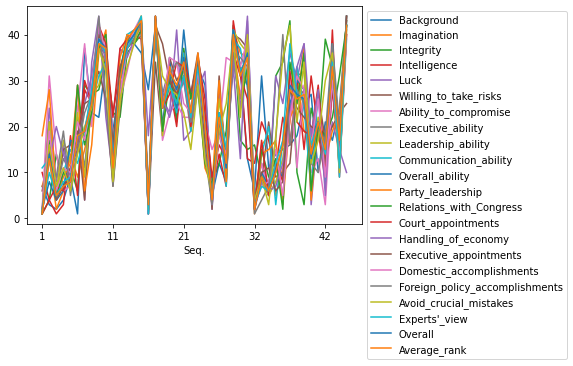

In [32]:
pres.plot().legend(bbox_to_anchor=(1, 1))

Text(0, 0.5, 'Rank')

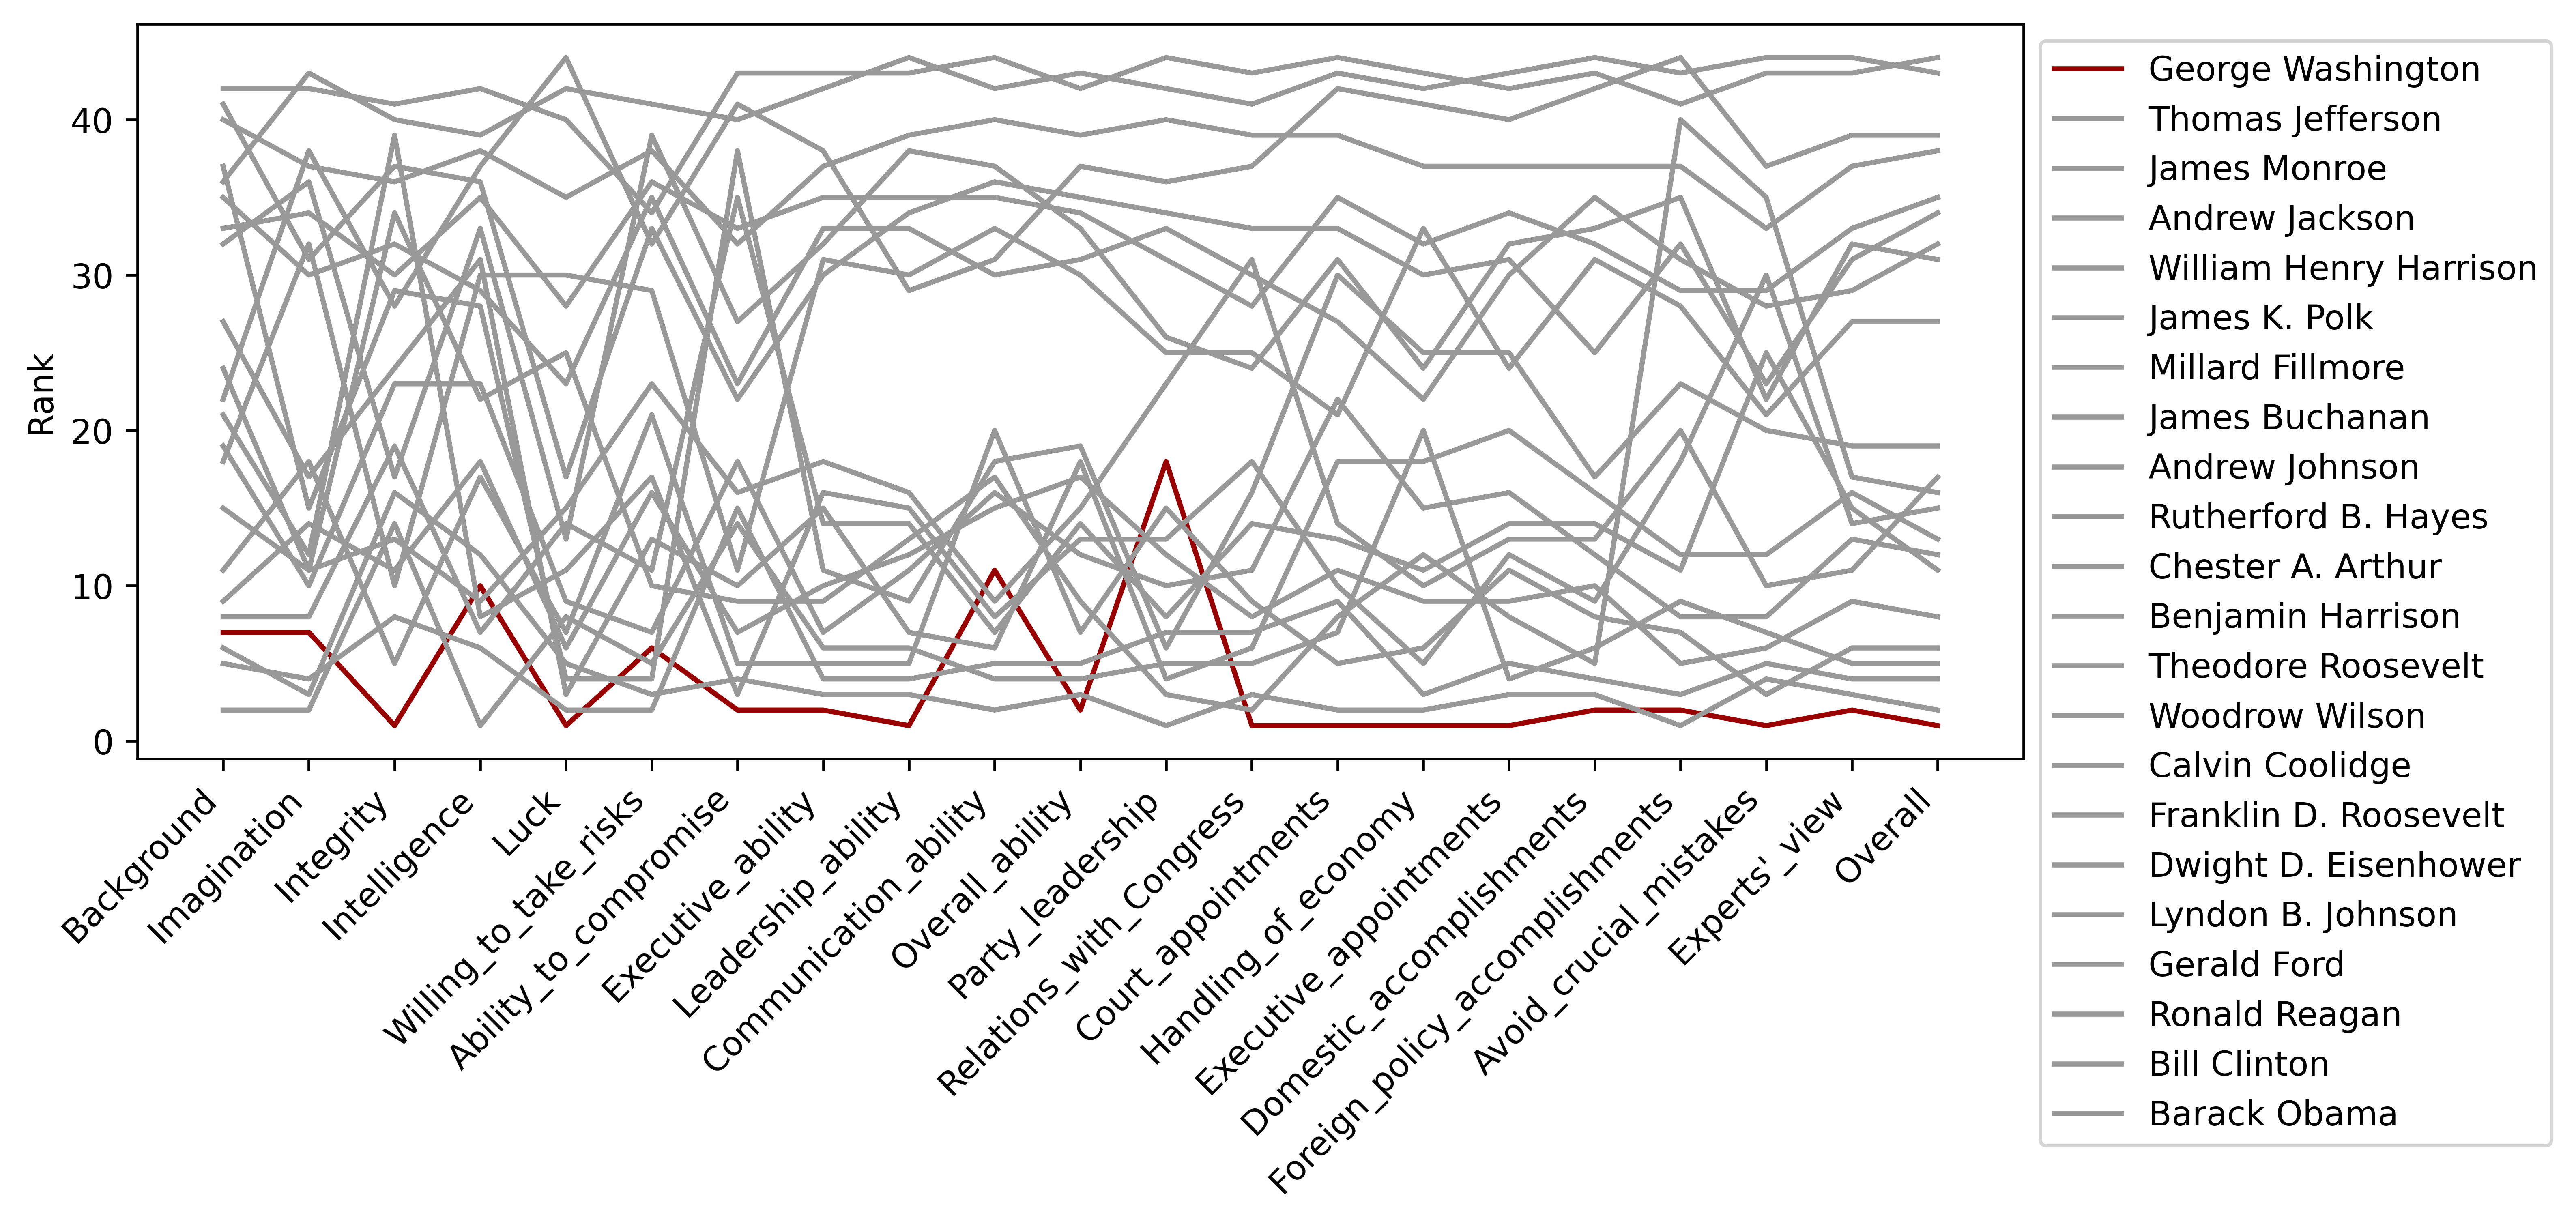

In [33]:
fig, ax = plt.subplots(dpi=600, figsize=(10, 4))
colors = []


def set_colors(df):
    for col in df.columns:
        if "George" in col:
            colors.append("#990000")
        else:
            colors.append("#999999")
    return df


(
    pres.set_index("President")
    .loc[::2, "Background":"Overall"]
    .T.pipe(set_colors)
    .plot(ax=ax, rot=45, color=colors)
    .legend(bbox_to_anchor=(1, 1))
)
ax.set_xticks(range(21))
ax.set_xticklabels(pres.loc[:, "Background":"Overall"].columns, ha="right")
ax.set_ylabel("Rank")

## 25.2

C:\Users\tmadu\AppData\Local\Temp\ipykernel_7120\2118132992.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=ax.get_xticklabels(), ha='right')


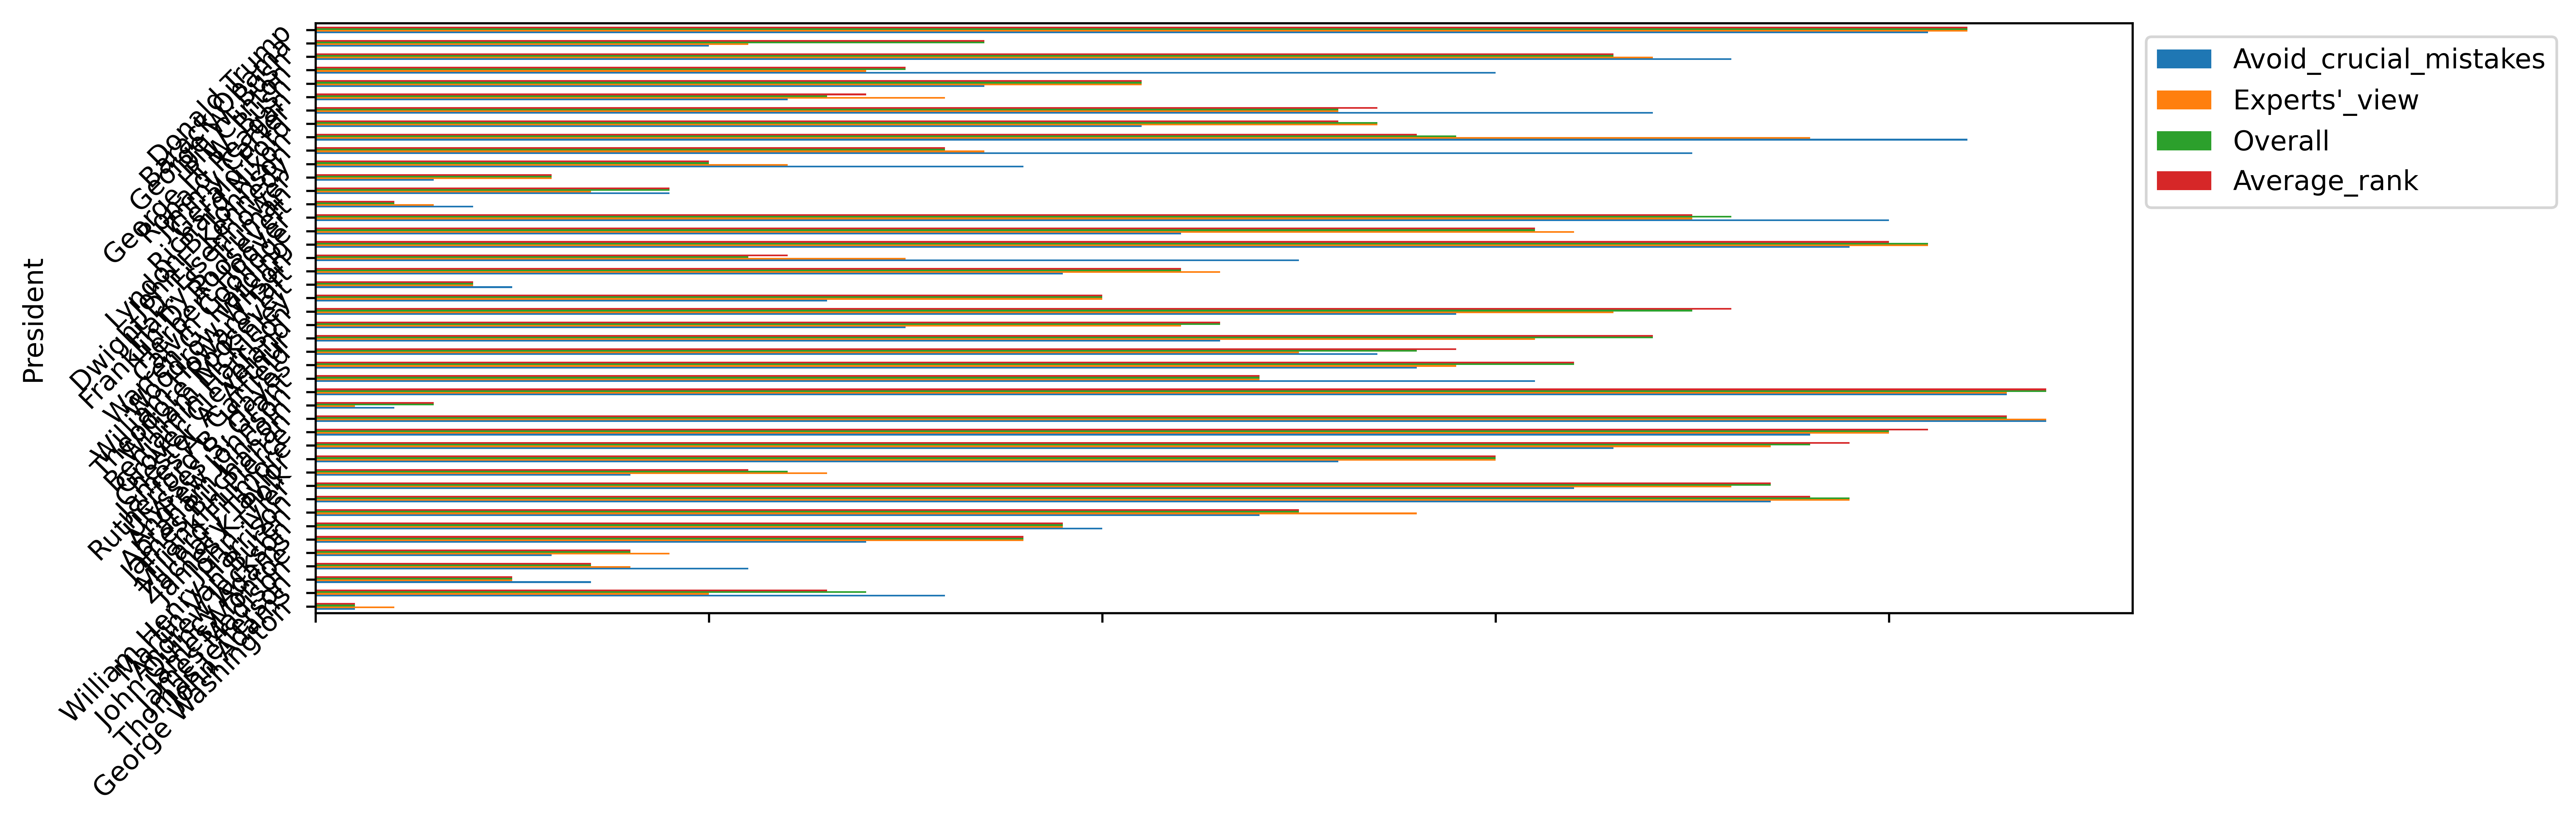

In [36]:
fig, ax = plt.subplots(dpi=600, figsize=(10,4))
(
    pres
    .set_index("President")
    .iloc[:, -5:-1]
    .plot.barh(rot=45, figsize=(12,4), ax=ax)
)
ax.set_xticklabels(labels=ax.get_xticklabels(), ha='right')
ax.legend(bbox_to_anchor=(1,1));

## 25.3

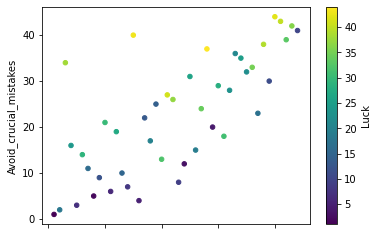

In [40]:
(
pres
.plot.scatter(x='Integrity', y='Avoid_crucial_mistakes',
             c='Luck', cmap='viridis')
);

In [38]:
pres.Integrity.corr(pres.Avoid_crucial_mistakes)

0.7455954897815362

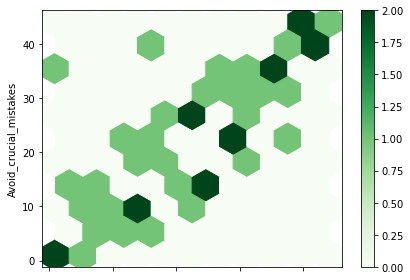

In [52]:
(
pres
    .plot.hexbin(x='Integrity', y='Avoid_crucial_mistakes',
                 # figsize=(20, 15),
                 gridsize=10,
                cmap='Greens')
)
plt.tight_layout();

## 25.4

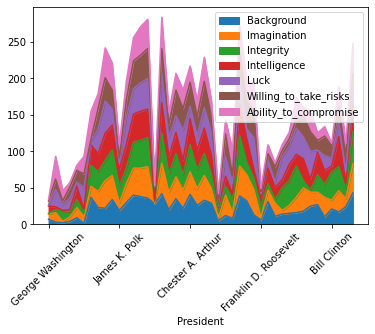

In [53]:
(
pres
    .plot.area(x='President', 
               y='Background Imagination Integrity Intelligence Luck '\
                 'Willing_to_take_risks Ability_to_compromise'.split(),
              rot=45)
)
ax.set_xticks(range(len(pres)))
ax.set_xticklabels(labels=pres.President, ha='right');

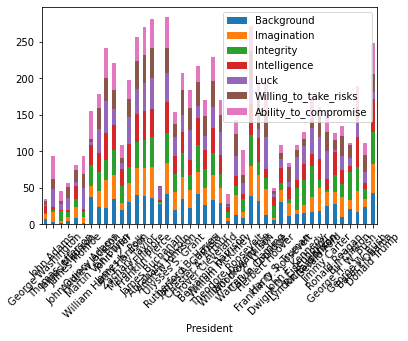

In [54]:
(
pres
    .plot.bar(x='President', 
               y='Background Imagination Integrity Intelligence Luck '\
                 'Willing_to_take_risks Ability_to_compromise'.split(),
              rot=45, stacked=True)
)
ax.set_xticks(range(len(pres)))
ax.set_xticklabels(labels=pres.President, ha='right');

## 25.5